In [89]:
name = "Bruno Mazetti Saito | Willian Hiroshi Takihi"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)



Name:  Bruno Mazetti Saito | Willian Hiroshi Takihi

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

%matplotlib inline

# Parte 1: Preparação do *Dataset*

In [91]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

print(X_train_ori.shape, y_train_ori.shape)
print(X_test_ori.shape, y_test_ori.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


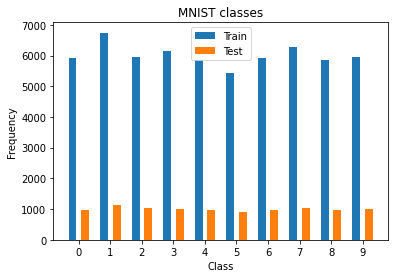

In [92]:
labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train_ori, return_counts=True)
uniquet, countst = np.unique(y_test_ori, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

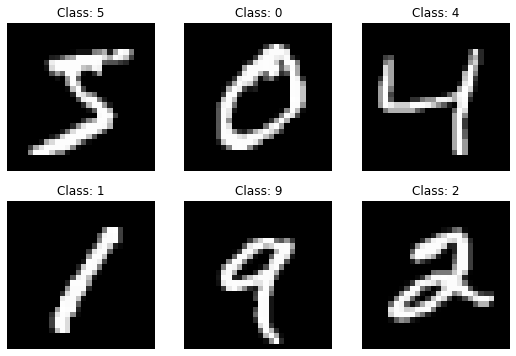

In [93]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_ori[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [94]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train_ori])
X_test  = np.array([image[::2, 1::2] for image in X_test_ori])

y_train = y_train_ori
y_test = y_test_ori

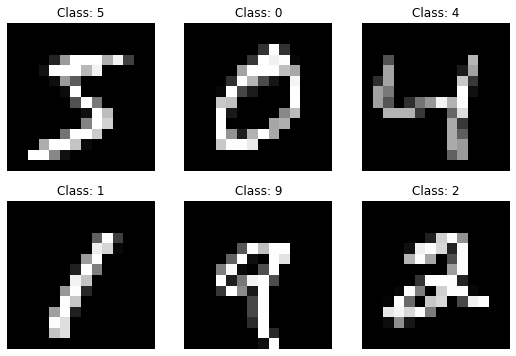

In [95]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [96]:
X_train = (X_train/255.0).astype('float32').reshape((60000,14*14))
X_test = (X_test/255.0).astype('float32').reshape((10000,14*14))

print(X_train.dtype)
print(X_test.dtype)

print("\nShape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("\nMinimum value in X_train:", np.amin(X_train))
print("Maximum value in X_train:", np.amax(X_train))

print("\nMinimum value in X_test:", np.amin(X_test))
print("Maximum value in X_test:", np.amax(X_test))


float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


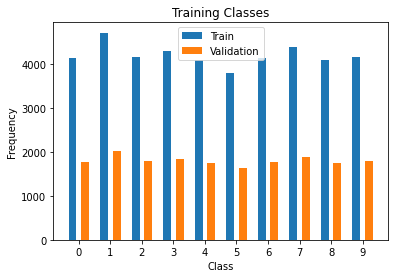

Train Set Shape: 
      X:  (42000, 196)
      Y:  (42000,)
Validation Set Shape: 
      X:  (18000, 196)
      Y:  (18000,)


In [97]:
# Divisão do conjunto de treinamento original
# 70% para treinamento e 30% para validação
XdTrain, XdVal, YdTrain, YdVal = train_test_split(X_train, y_train, test_size=0.3, random_state=1, stratify=y_train)

# Mostrar que foi dividido de maneira estratificada
unique, counts = np.unique(YdTrain, return_counts=True)
uniquet, countst = np.unique(YdVal, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(uniquet + 0.2, countst, 0.25, label='Validation')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('Training Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print("Train Set Shape: ")
print("     ", "X: ", XdTrain.shape)
print("     ", "Y: ", YdTrain.shape)
print("Validation Set Shape: ")
print("     ", "X: ", XdVal.shape)
print("     ", "Y: ", YdVal.shape)

# Parte 2: Treinamento e seleção de melhor conjunto de hiperparâmetros

## &emsp; 2.1 Inicialização dos modelos

In [98]:
nMaxIter = 50000                                # Número máximo de iterações até a convergência

reglog = LogisticRegression(max_iter=nMaxIter, random_state=0)
redeNeural = MLPClassifier(max_iter=nMaxIter, random_state=0)
svm = SVC(max_iter=nMaxIter, random_state=0)

## &emsp; 2.2 Escolha dos hiperparâmetros a serem ajustados

In [99]:
# Parâmetros para modelo de regressão logística
C_p = [1, 10, 100]                              # Inverso da magnitude de regularização
class_weight_p = ['balanced', None]             # Modo como são associados pesos a cada classe
param_reglog = dict(C=C_p, class_weight=class_weight_p)

# Parâmetros para modelo de rede neural
hidden_layer_sizes_p = np.arange(15, 21)        # Número de neurônios nas camadas ocultas
act_p = ['logistic', 'identity']                # Função de ativação para a camada oculta
alpha_p = [0.0001, 0.005]                       # Termo da regularização
param_redeNeural = dict(hidden_layer_sizes=hidden_layer_sizes_p, activation=act_p, alpha=alpha_p)

# Parâmetros para modelo de SVM
kernel_p = ['linear', 'rbf']                    # Método de transformação de dados
C_p = [1, 10, 100]                              # Inverso da magnitude de regularização
gamma_p = ['scale', 'auto']                     # Coeficiente utilizado no Kernel
param_svm = dict(kernel=kernel_p, C=C_p, gamma=gamma_p)

## &emsp; 2.3 Método para seleção de melhores hiperparâmetros

### &emsp; &emsp; A seleção dos hiperparâmetros foi feita utilizando a função *GridSearchCV*. Utilizando o método de *Cross-Validation*, a função usa cada combinação de hiperparâmetros com seu respectivo modelo para encontrar o melhor conjunto de hiperparâmetros, ou seja, aquele que retorna o maior *score*. No caso, foi utilizado um *5-fold Cross-Validation* com métrica de avaliação *accucary*, ou seja, o quão perto a medição prevista está do seu real valor.

In [100]:
# Regressão Logística
reglog_grid = GridSearchCV(reglog, param_reglog, cv=5, scoring='accuracy', n_jobs=-1)
reglog_grid.fit(XdTrain, YdTrain)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=50000, random_state=0),
             n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'class_weight': ['balanced', None]},
             scoring='accuracy')

In [101]:
# Rede Neural
redeNeural_grid = GridSearchCV(redeNeural, param_redeNeural, cv=5, scoring='accuracy', n_jobs=-1)
redeNeural_grid.fit(XdTrain, YdTrain)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=50000, random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'identity'],
                         'alpha': [0.0001, 0.005],
                         'hidden_layer_sizes': array([15, 16, 17, 18, 19, 20])},
             scoring='accuracy')

In [102]:
# SVM
svm_grid = GridSearchCV(svm, param_svm, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(XdTrain, YdTrain)

GridSearchCV(cv=5, estimator=SVC(max_iter=50000, random_state=0), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

## &emsp; 2.4 Visualização do retorno da função *GridSearchCV* para modelo de Regressão Logística

### &emsp; &emsp; Para melhor entendimento do que está ocorrendo na função *GridSearchCV*, a tabela abaixo mostra os resultados obtidos pela função para encontrar os melhores hiperparâmetros para o modelo de regressão logística.

In [103]:
df = pd.concat([pd.DataFrame(reglog_grid.cv_results_["params"]), pd.DataFrame(reglog_grid.cv_results_["mean_test_score"], columns=["Média de Score"])], axis=1)
df = df.rename(columns={'class_weight': 'Class Weight'})
df

,C,Class Weight,Média de Score
0,1,balanced,0.908333
1,1,None,0.908048
2,10,balanced,0.908286
3,10,None,0.908357
4,100,balanced,0.908000
5,100,None,0.908000


## &emsp; 2.5 Amostragem dos melhores hiperparâmetros de cada modelo

In [104]:
# Regressão Logística
print("Melhores Parâmetros para Regressão Logística")
print("     C:", reglog_grid.best_params_['C'])
print("     Class_Weight:", reglog_grid.best_params_['class_weight'])
print("Score do estimador com melhores parâmetros:", reglog_grid.best_score_)
print("Melhor estimador:", reglog_grid.best_estimator_)
print("")
print("-------------------------")
print("")

# Rede Neural
print("Melhores Parâmetros para Rede Neural")
print("     Hidden_Layer_Sizes:", redeNeural_grid.best_params_['hidden_layer_sizes'])
print("     Activation:", redeNeural_grid.best_params_['activation'])
print("     Alpha:", redeNeural_grid.best_params_['alpha'])
print("Score do estimador com melhores parâmetros:", redeNeural_grid.best_score_)
print("Melhor estimador:", redeNeural_grid.best_estimator_)
print("")
print("-------------------------")
print("")

# SVM
print("Melhores Parâmetros para SVM")
print("     Kernel:", svm_grid.best_params_['kernel'])
print("     C:", svm_grid.best_params_['C'])
print("     Gama:", svm_grid.best_params_['gamma'])
print("Score do estimador com melhores parâmetros:", svm_grid.best_score_)
print("Melhor estimador:", svm_grid.best_estimator_)

Melhores Parâmetros para Regressão Logística
     C: 10
     Class_Weight: None
Score do estimador com melhores parâmetros: 0.9083571428571429
Melhor estimador: LogisticRegression(C=10, max_iter=50000, random_state=0)

-------------------------

Melhores Parâmetros para Rede Neural
     Hidden_Layer_Sizes: 20
     Activation: logistic
     Alpha: 0.005
Score do estimador com melhores parâmetros: 0.9488571428571427
Melhor estimador: MLPClassifier(activation='logistic', alpha=0.005, hidden_layer_sizes=20,
              max_iter=50000, random_state=0)

-------------------------

Melhores Parâmetros para SVM
     Kernel: rbf
     C: 10
     Gama: scale
Score do estimador com melhores parâmetros: 0.9758095238095237
Melhor estimador: SVC(C=10, max_iter=50000, random_state=0)


# Parte 3: Escolha do Modelo Final

<a id="intro"></a>
## &emsp; 3.1 Performance dos modelos aplicados no *TrainingSet* e *ValidationSet*

In [105]:
# Performance dos modelos aplicados no ValidationSet
scoreReglog = reglog_grid.score(XdVal, YdVal)
scoreRedeNeural = redeNeural_grid.score(XdVal, YdVal)
scoreSVM = svm_grid.score(XdVal, YdVal)

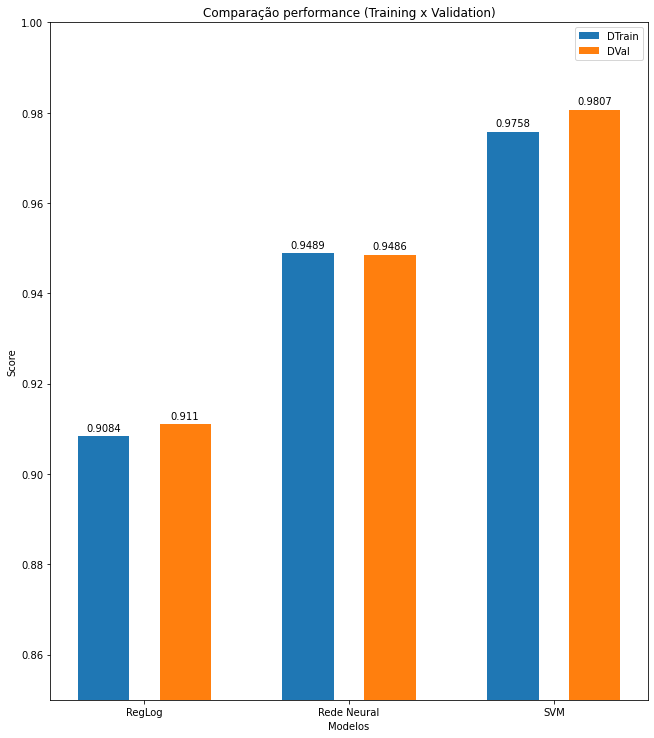

In [106]:
# Visualização da performance de cada modelo aplicado ao TrainingSet e ValidationSet
models = np.array(['RegLog', 'Rede Neural', 'SVM'])
unique = np.array(np.arange(len(models)))

scoresDtrain = np.array([reglog_grid.best_score_, redeNeural_grid.best_score_, svm_grid.best_score_])
scoresDtrain = np.around(scoresDtrain, 4)
scoresDval = np.array([scoreReglog, scoreRedeNeural, scoreSVM])
scoresDval = np.around(scoresDval, 4)

fig, ax = plt.subplots(figsize=(9, 10))
rects1 = ax.bar(unique - 0.2, scoresDtrain, 0.25, label='DTrain')
rects2 = ax.bar(unique + 0.2, scoresDval, 0.25, label='DVal')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(models)
ax.set_ylim([0.85, 1])

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.title('Comparação performance (Training x Validation)')
plt.xlabel('Modelos')
plt.ylabel('Score')
plt.show()

### &emsp; &emsp; É possível observar que, em cada caso, as performances dos modelos aplicados ao *ValidationSet* (*out-of-sample*) são similares se comparados às do *TrainSet* (*in-sample*). Isso é uma indicação de que os modelos treinaram de maneira correta e contornaram problemas de *overfitting*. 

## &emsp; 3.2 Comparação das performances entre modelos

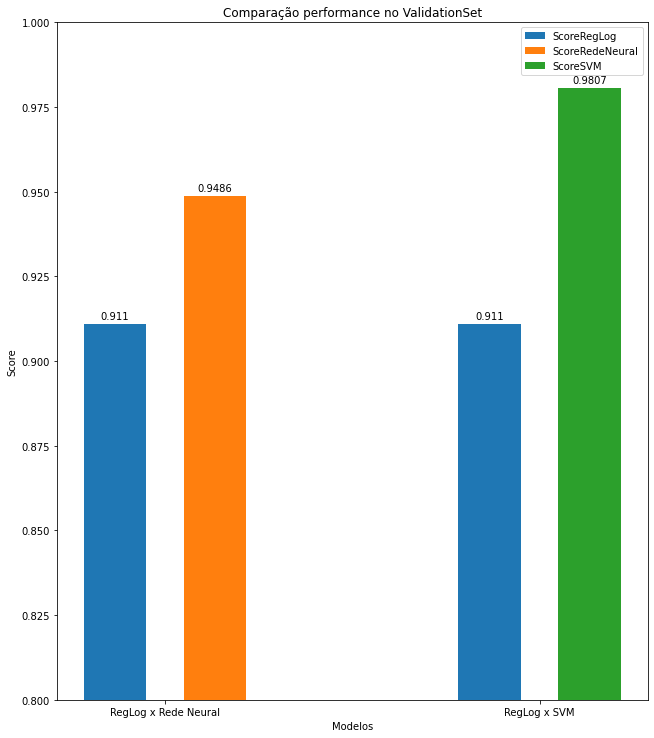

In [107]:
# Visualização das perfomances dos modelos aplicados no ValidationSet
models = np.array(['RegLog x Rede Neural', 'RegLog x SVM'])
unique = np.array([0, 1.5])

scoresDvalReglog = np.around(np.array([scoreReglog, scoreReglog]), 4)
scoresDvalRedeNeural = np.around(np.array([scoreRedeNeural, 0]), 4)
scoresDvalSVM = np.around(np.array([0, scoreSVM]), 4)

fig, ax = plt.subplots(figsize=(9, 10))
rects1 = ax.bar(unique - 0.2, scoresDvalReglog, 0.25, label='ScoreRegLog')
rects2 = ax.bar(unique + 0.2, scoresDvalRedeNeural, 0.25, label='ScoreRedeNeural')
rects3 = ax.bar(unique + 0.2, scoresDvalSVM, 0.25, label='ScoreSVM')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(models)
ax.set_ylim([0.8, 1])

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.title('Comparação performance no ValidationSet')
plt.xlabel('Modelos')
plt.ylabel('Score')
plt.show()

In [108]:
melhoria1 = ((scoreRedeNeural - scoreReglog) * 100) / scoreReglog
melhoria2 = ((scoreSVM - scoreReglog) * 100) / scoreReglog

print("Aumento percentual da precisão dos modelos RegLog e Rede Neural: ", np.around(melhoria1, 2), "%")
print("Aumento percentual da precisão dos modelos RegLog e SVM:         ", np.around(melhoria2, 2), "%")

Aumento percentual da precisão dos modelos RegLog e Rede Neural:  4.12 %
Aumento percentual da precisão dos modelos RegLog e SVM:          7.65 %


### &emsp; &emsp; Considerando os resultados mostrados na célula acima, vemos que a utilização do modelo SVM resulta em um aumento percentual de precisão maior, em relação à regressão logística, do que se comparado ao da rede neural. Por esse motivo, o modelo final escolhido é o SVM.

# Parte 4: Estimativa do erro

## &emsp; 4.1 Performance do modelo SVM no *TestSet*

In [109]:
scoreSVMdval = scoreSVM
scoreSVMdtest = svm_grid.score(X_test, y_test)

print("Performance do modelo SVM")
print("     Score no DVal:          ", scoreSVMdval)
print("     Score no DTest:         ", scoreSVMdtest)
print("     Diferença entre scores: ", abs(scoreSVMdval - scoreSVMdtest))

Performance do modelo SVM
     Score no DVal:           0.9806666666666667
     Score no DTest:          0.9789
     Diferença entre scores:  0.0017666666666666941


### &emsp; &emsp; É notável que a diferença do *score* do modelo aplicado no *ValidationSet* e *TestSet* é mínimo. Isso mostra que estatisticamente há uma grande chance de que o modelo treinado funcionará tão bem quanto ele performou no *TestSet*.

## &emsp; 4.2 Treinamento do modelo SVM no *TrainingSet* $\cup$*ValidationSet*

In [110]:
svm_all = svm_grid

svm_all.fit(X_train, y_train)
scoreSVMdval = svm_all.score(XdVal, YdVal)
scoreSVMdtest = svm_all.score(X_test, y_test)

print("Performance do modelo SVM após treinamento")
print("     Score no DVal:          ", scoreSVMdval)
print("     Score no DTest:         ", scoreSVMdtest)
print("     Diferença entre scores: ", abs(scoreSVMdval - scoreSVMdtest))

Performance do modelo SVM após treinamento
     Score no DVal:           0.9989444444444444
     Score no DTest:          0.9815
     Diferença entre scores:  0.017444444444444374


### &emsp; &emsp; Após o treinamento do modelo SVM a partir do conjunto de dados original, podemos observar que o *score* em DVal é superior a quando o SVM foi treinado com o *TrainingSet*. Isso se deve ao fato do *ValidationSet* estar contido no próprio conjunto de treinamento original, o que causa um enviesamento. 
### &emsp; &emsp; O *score* em DTest também é maior, mas não existe a mesma garantia de que o modelo performará dessa mesma maneira *out-of-sample*.

# Parte 5: Síntese dos resultados obtidos

## &emsp; 5.1 Seleção de hiperparâmetros

### &emsp; &emsp; Feita a divisão do conjunto de treinamento original em *TrainingSet* e *ValidationSet*, foi realizada a seleção dos melhores hiperparâmetros a serem usados no treinamento dos modelos. Para tanto, utilizou-se a função *GridSearchCV*.
### &emsp; &emsp; No final, o melhor conjunto de hiperparâmetros encontrados para cada modelo foram:

In [113]:
# Regressão Logística
print("Melhores Parâmetros para Regressão Logística")
print("     C:", reglog_grid.best_params_['C'])
print("     Class_Weight:", reglog_grid.best_params_['class_weight'])
print("")
print("-------------------------")
print("")

# Rede Neural
print("Melhores Parâmetros para Rede Neural")
print("     Hidden_Layer_Sizes:", redeNeural_grid.best_params_['hidden_layer_sizes'])
print("     Activation:", redeNeural_grid.best_params_['activation'])
print("     Alpha:", redeNeural_grid.best_params_['alpha'])
print("")
print("-------------------------")
print("")

# SVM
print("Melhores Parâmetros para SVM")
print("     Kernel:", svm_grid.best_params_['kernel'])
print("     C:", svm_grid.best_params_['C'])
print("     Gama:", svm_grid.best_params_['gamma'])

Melhores Parâmetros para Regressão Logística
     C: 10
     Class_Weight: None

-------------------------

Melhores Parâmetros para Rede Neural
     Hidden_Layer_Sizes: 20
     Activation: logistic
     Alpha: 0.005

-------------------------

Melhores Parâmetros para SVM
     Kernel: rbf
     C: 10
     Gama: scale


## &emsp; 5.2 Escolha do melhor modelo

### &emsp; &emsp; Primeiro, foi feita a comparação da performance dos modelos aplicados ao *TrainingSet* e *ValidationSet*. No final, concluiu-se que, como ambas as performances foram semelhantes, os modelos conseguiram treinar de maneira adequada. (Seção 3.1) 
### &emsp; &emsp; Segundo, comparando-se o ganho de precisão entre os modelos, o SVM superou os demais e foi escolhido como modelo final. (Seção 3.2)

## &emsp; 5.3 Estimativa do erro

### &emsp; &emsp; Utilizando o modelo escolhido SVM, foi feito uma comparação de sua performance aplicado ao *ValidationSet* e *TestSet*. Observou-se que ambos os valores de *score* são próximos e altos, dessa maneira é possível dizer que o modelo tem grandes chances de funcionar bem *out-of-sample*. (Seção 4.1)
### &emsp; &emsp; Depois, o modelo SVM foi retreinado a partir do conjunto de treinamento original e foi avaliado a sua performance no *ValidationSet* e *TestSet*. Concluindo que há uma melhora na performance, mas é possível que os valores de *score* estejam enviesados. (Seção 4.2)